<a href="https://colab.research.google.com/github/JerryAnggara/Skripsi_Perhitungan_Suara_CV/blob/main/Model%20Training/Object%20Detection/Yolov8s_Training_Model_1_Skripsi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Skripsi: Model Training YoloV8s** </br>
Source Dataset: https://app.roboflow.com/skripsi-2025-dnrgq/skripsi2025-pre1/2

In [ ]:
!nvidia-smi

Thu May 22 05:16:20 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   38C    P8             10W /   70W |       0MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [ ]:
!pip install ultralytics

from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()

Ultralytics 8.3.141 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 41.6/112.6 GB disk)


In [ ]:
import os
from ultralytics import YOLO

from IPython.display import display, Image

In [ ]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="7e1kBC6srdwaqLDGRSP4")
project = rf.workspace("skripsi-2025-dnrgq").project("skripsi2025-pre1")
version = project.version(2)
dataset = version.download("yolov8")

loading Roboflow workspace...
loading Roboflow project...


In [ ]:
!yolo task=detect mode=train model=yolov8s.pt data=/content/Skripsi2025---Pre1-2/data.yaml epochs=50 imgsz=640 batch=32

100% 21.5M/21.5M [00:00<00:00, 105MB/s]
Ultralytics 8.3.141 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=32, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/Skripsi2025---Pre1-2/data.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=50, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8s.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=train, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100,

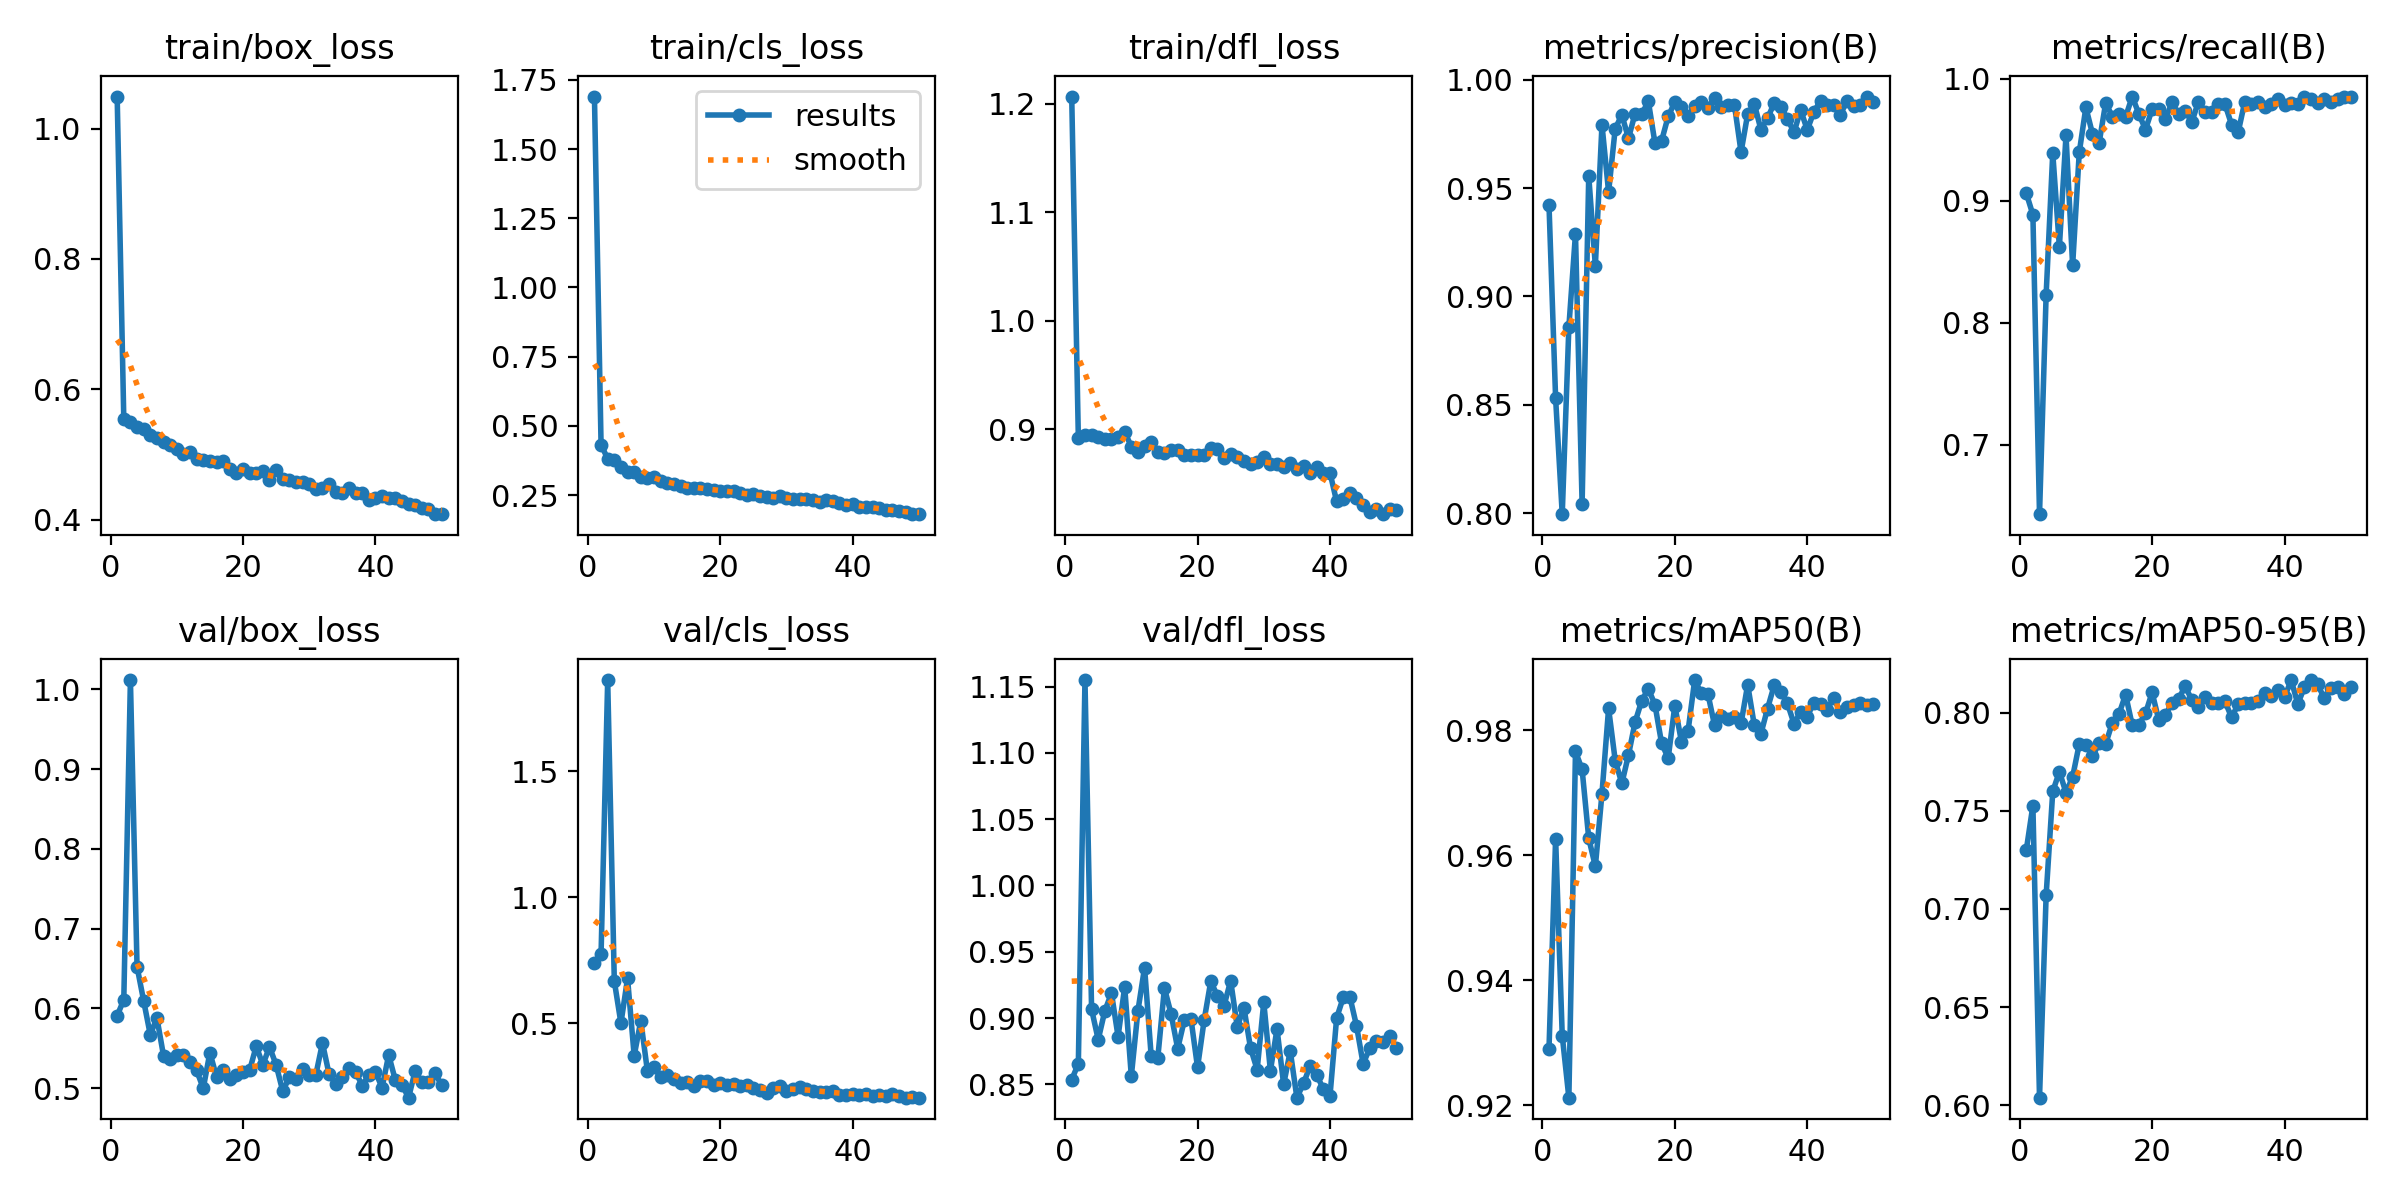

In [ ]:
Image(filename=f'/content/runs/detect/train/results.png', width=800)

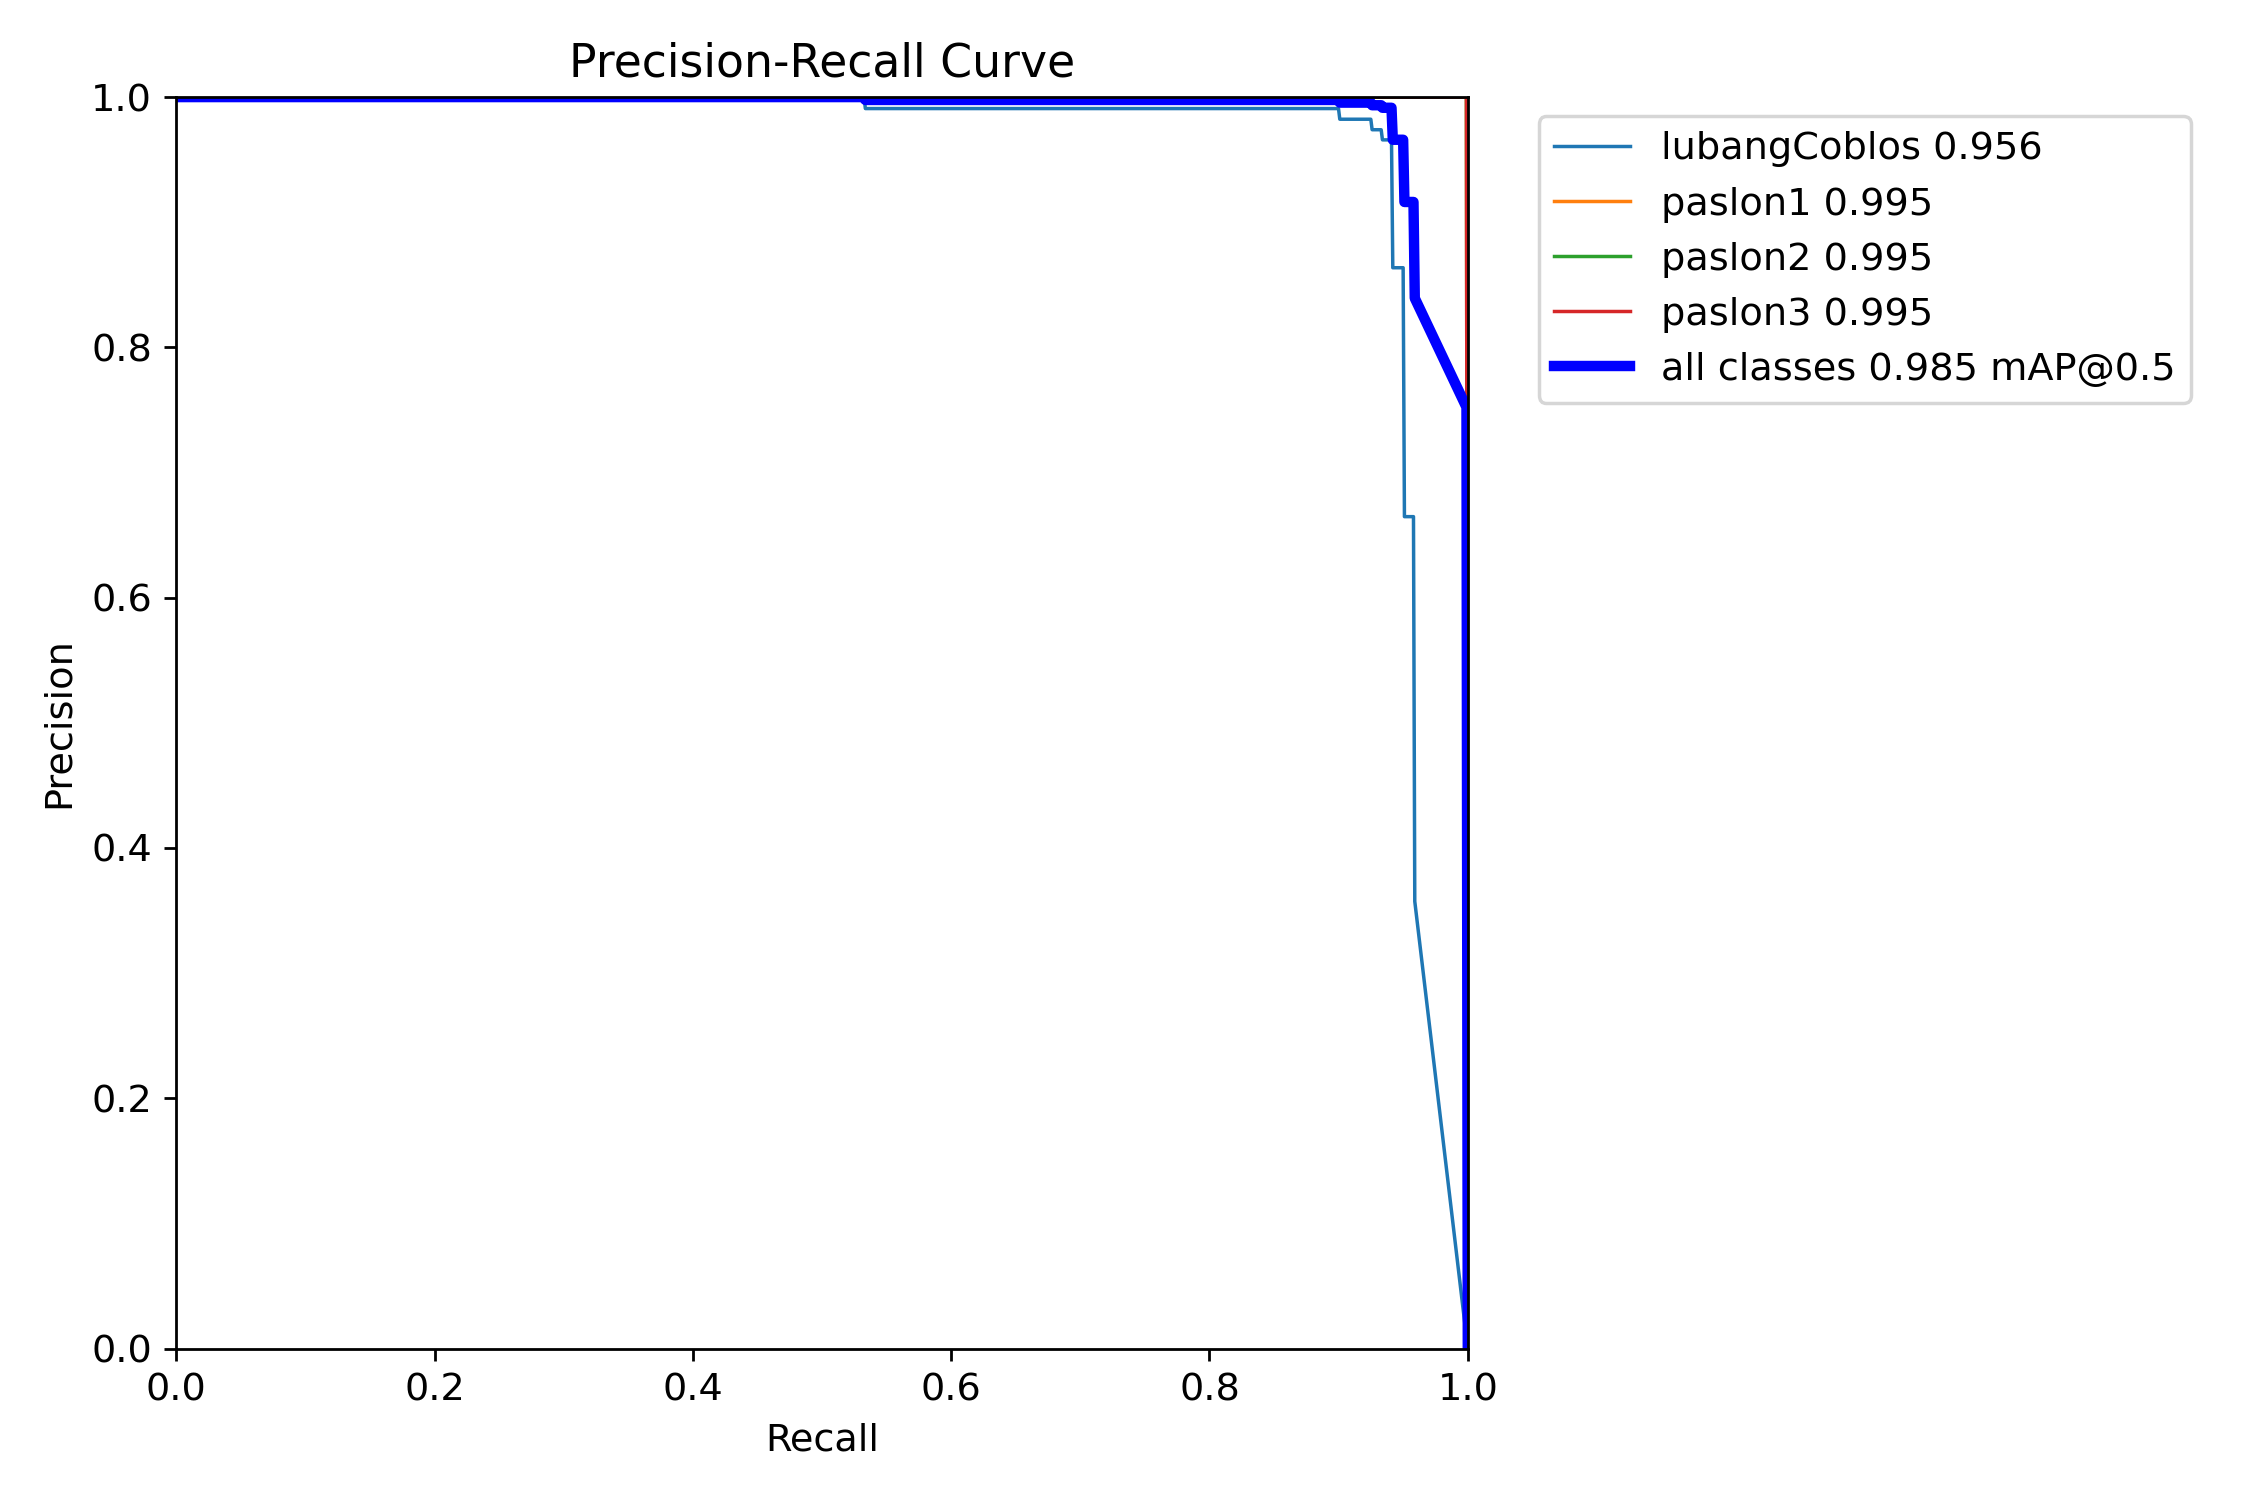

In [ ]:
Image(filename=f'/content/runs/detect/train/PR_curve.png', width=800)

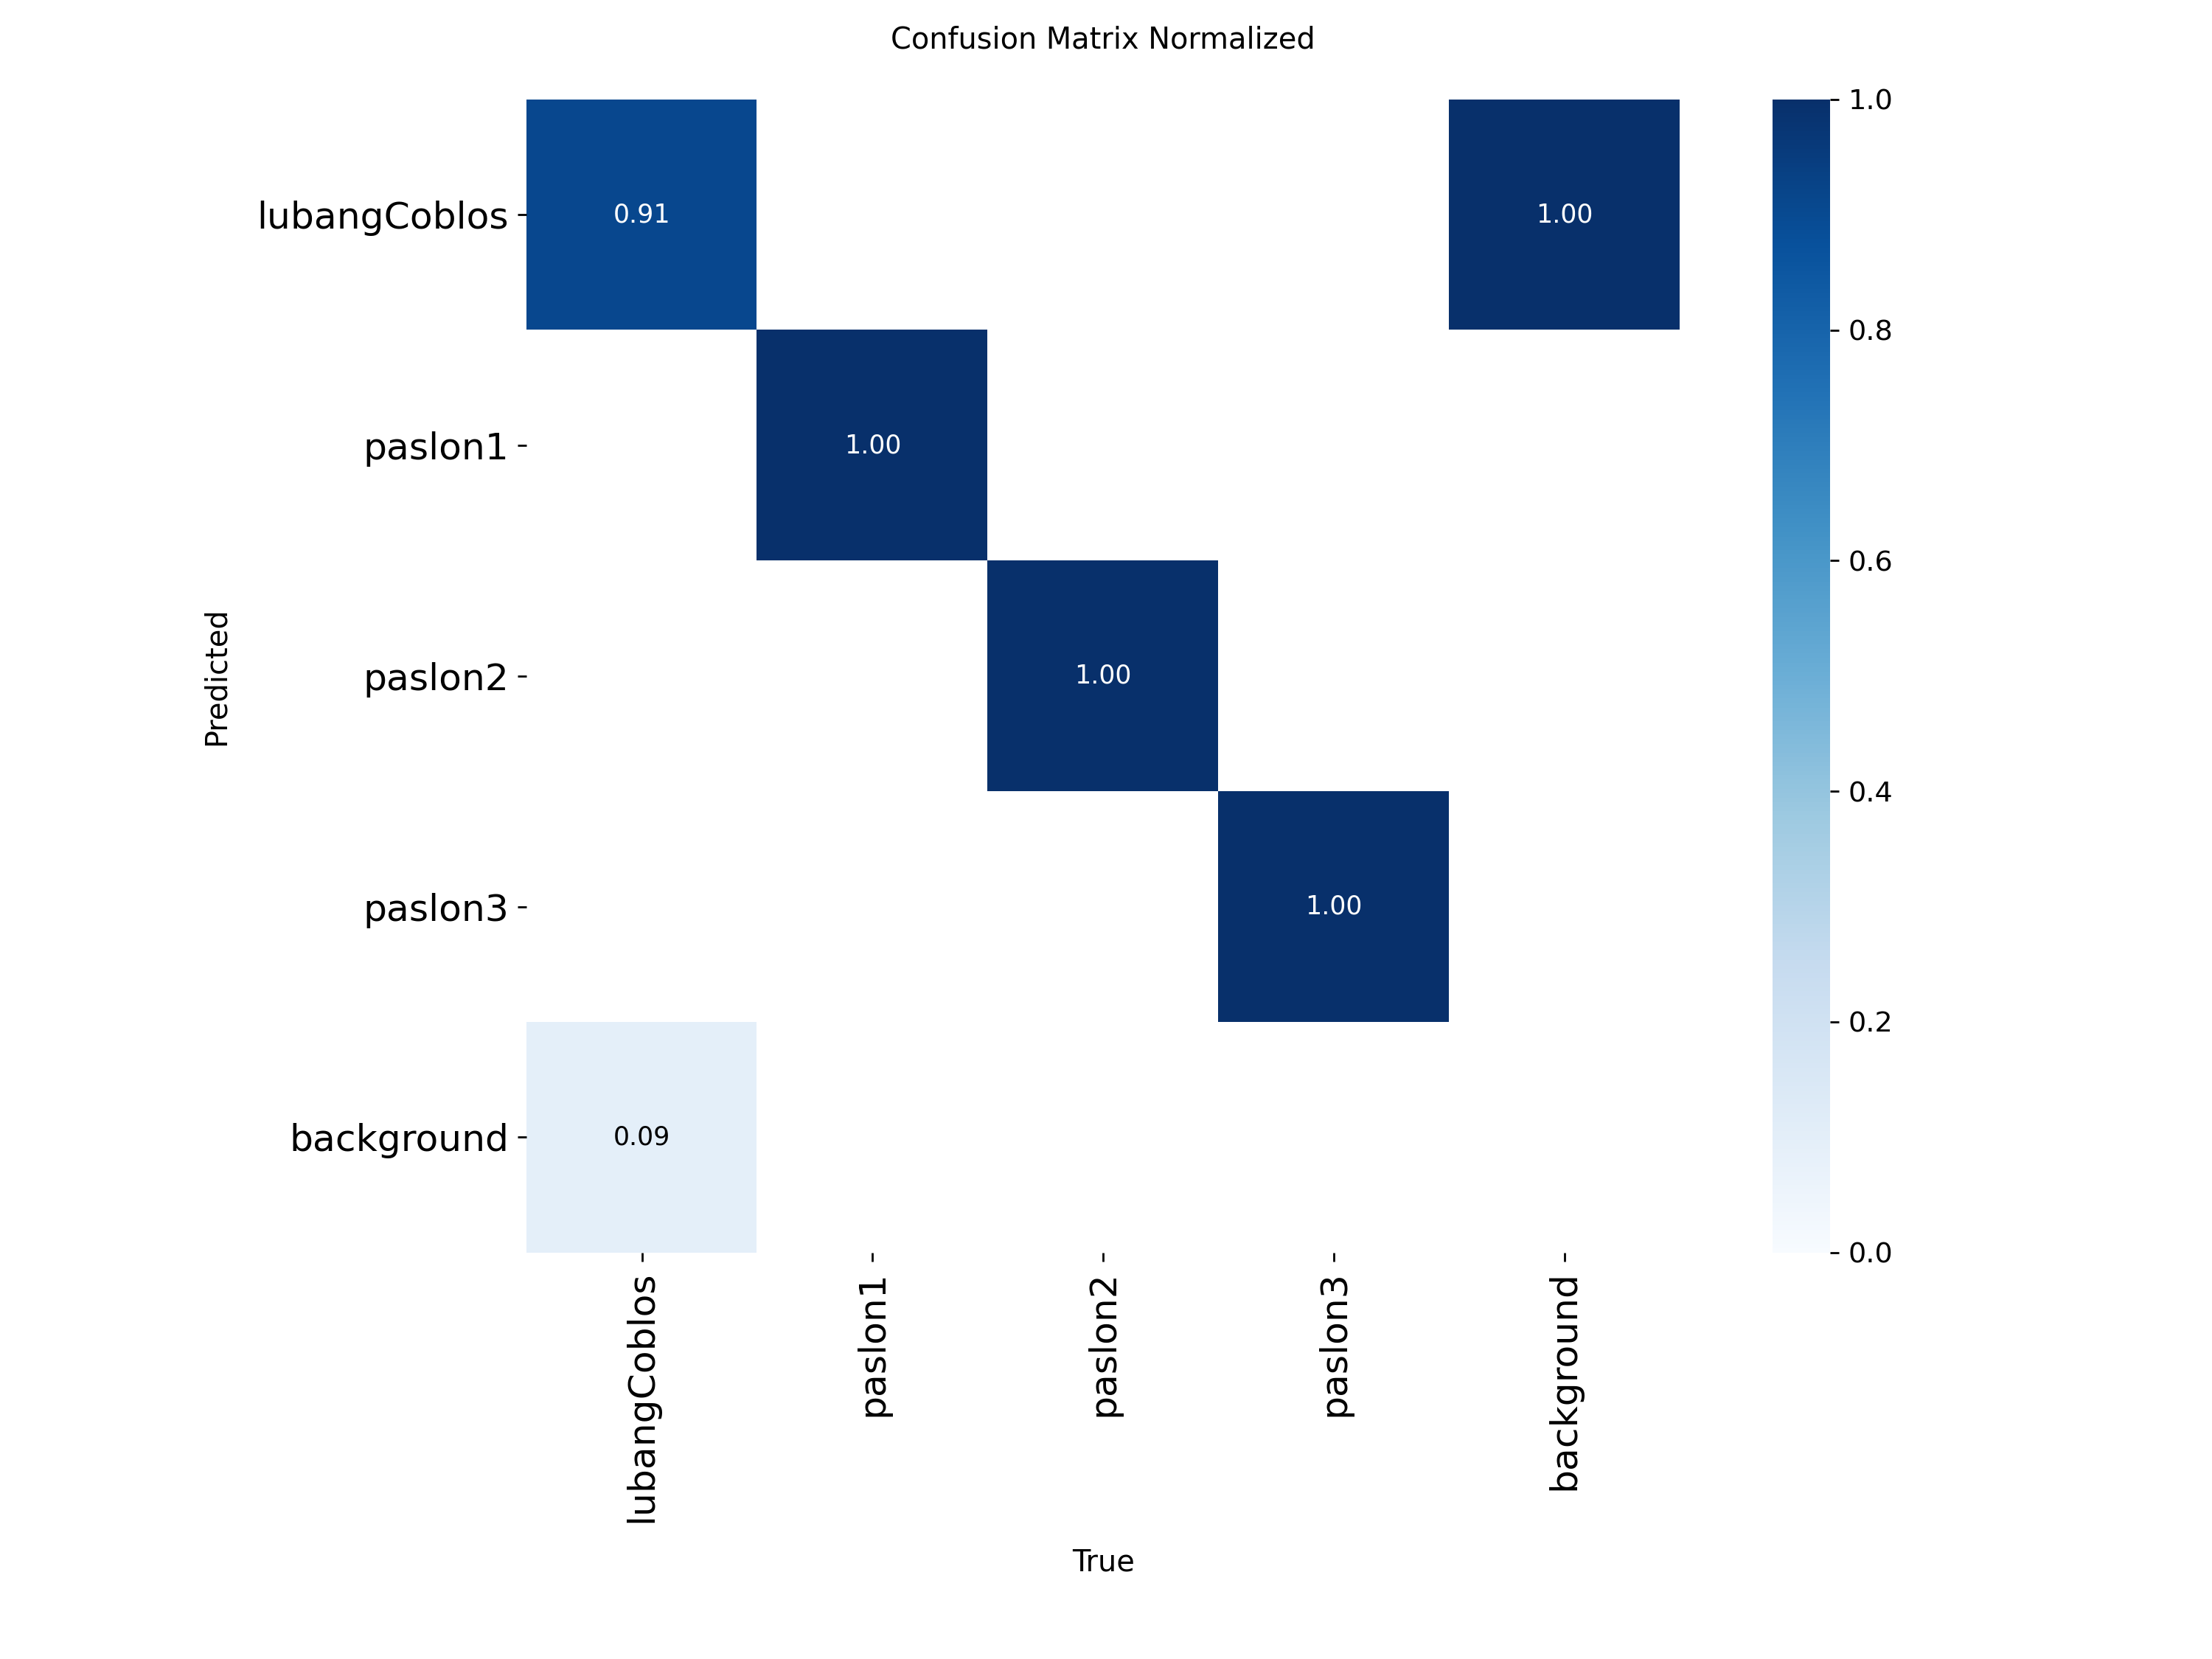

In [ ]:
Image(filename=f'/content/runs/detect/train/confusion_matrix_normalized.png', width=800)

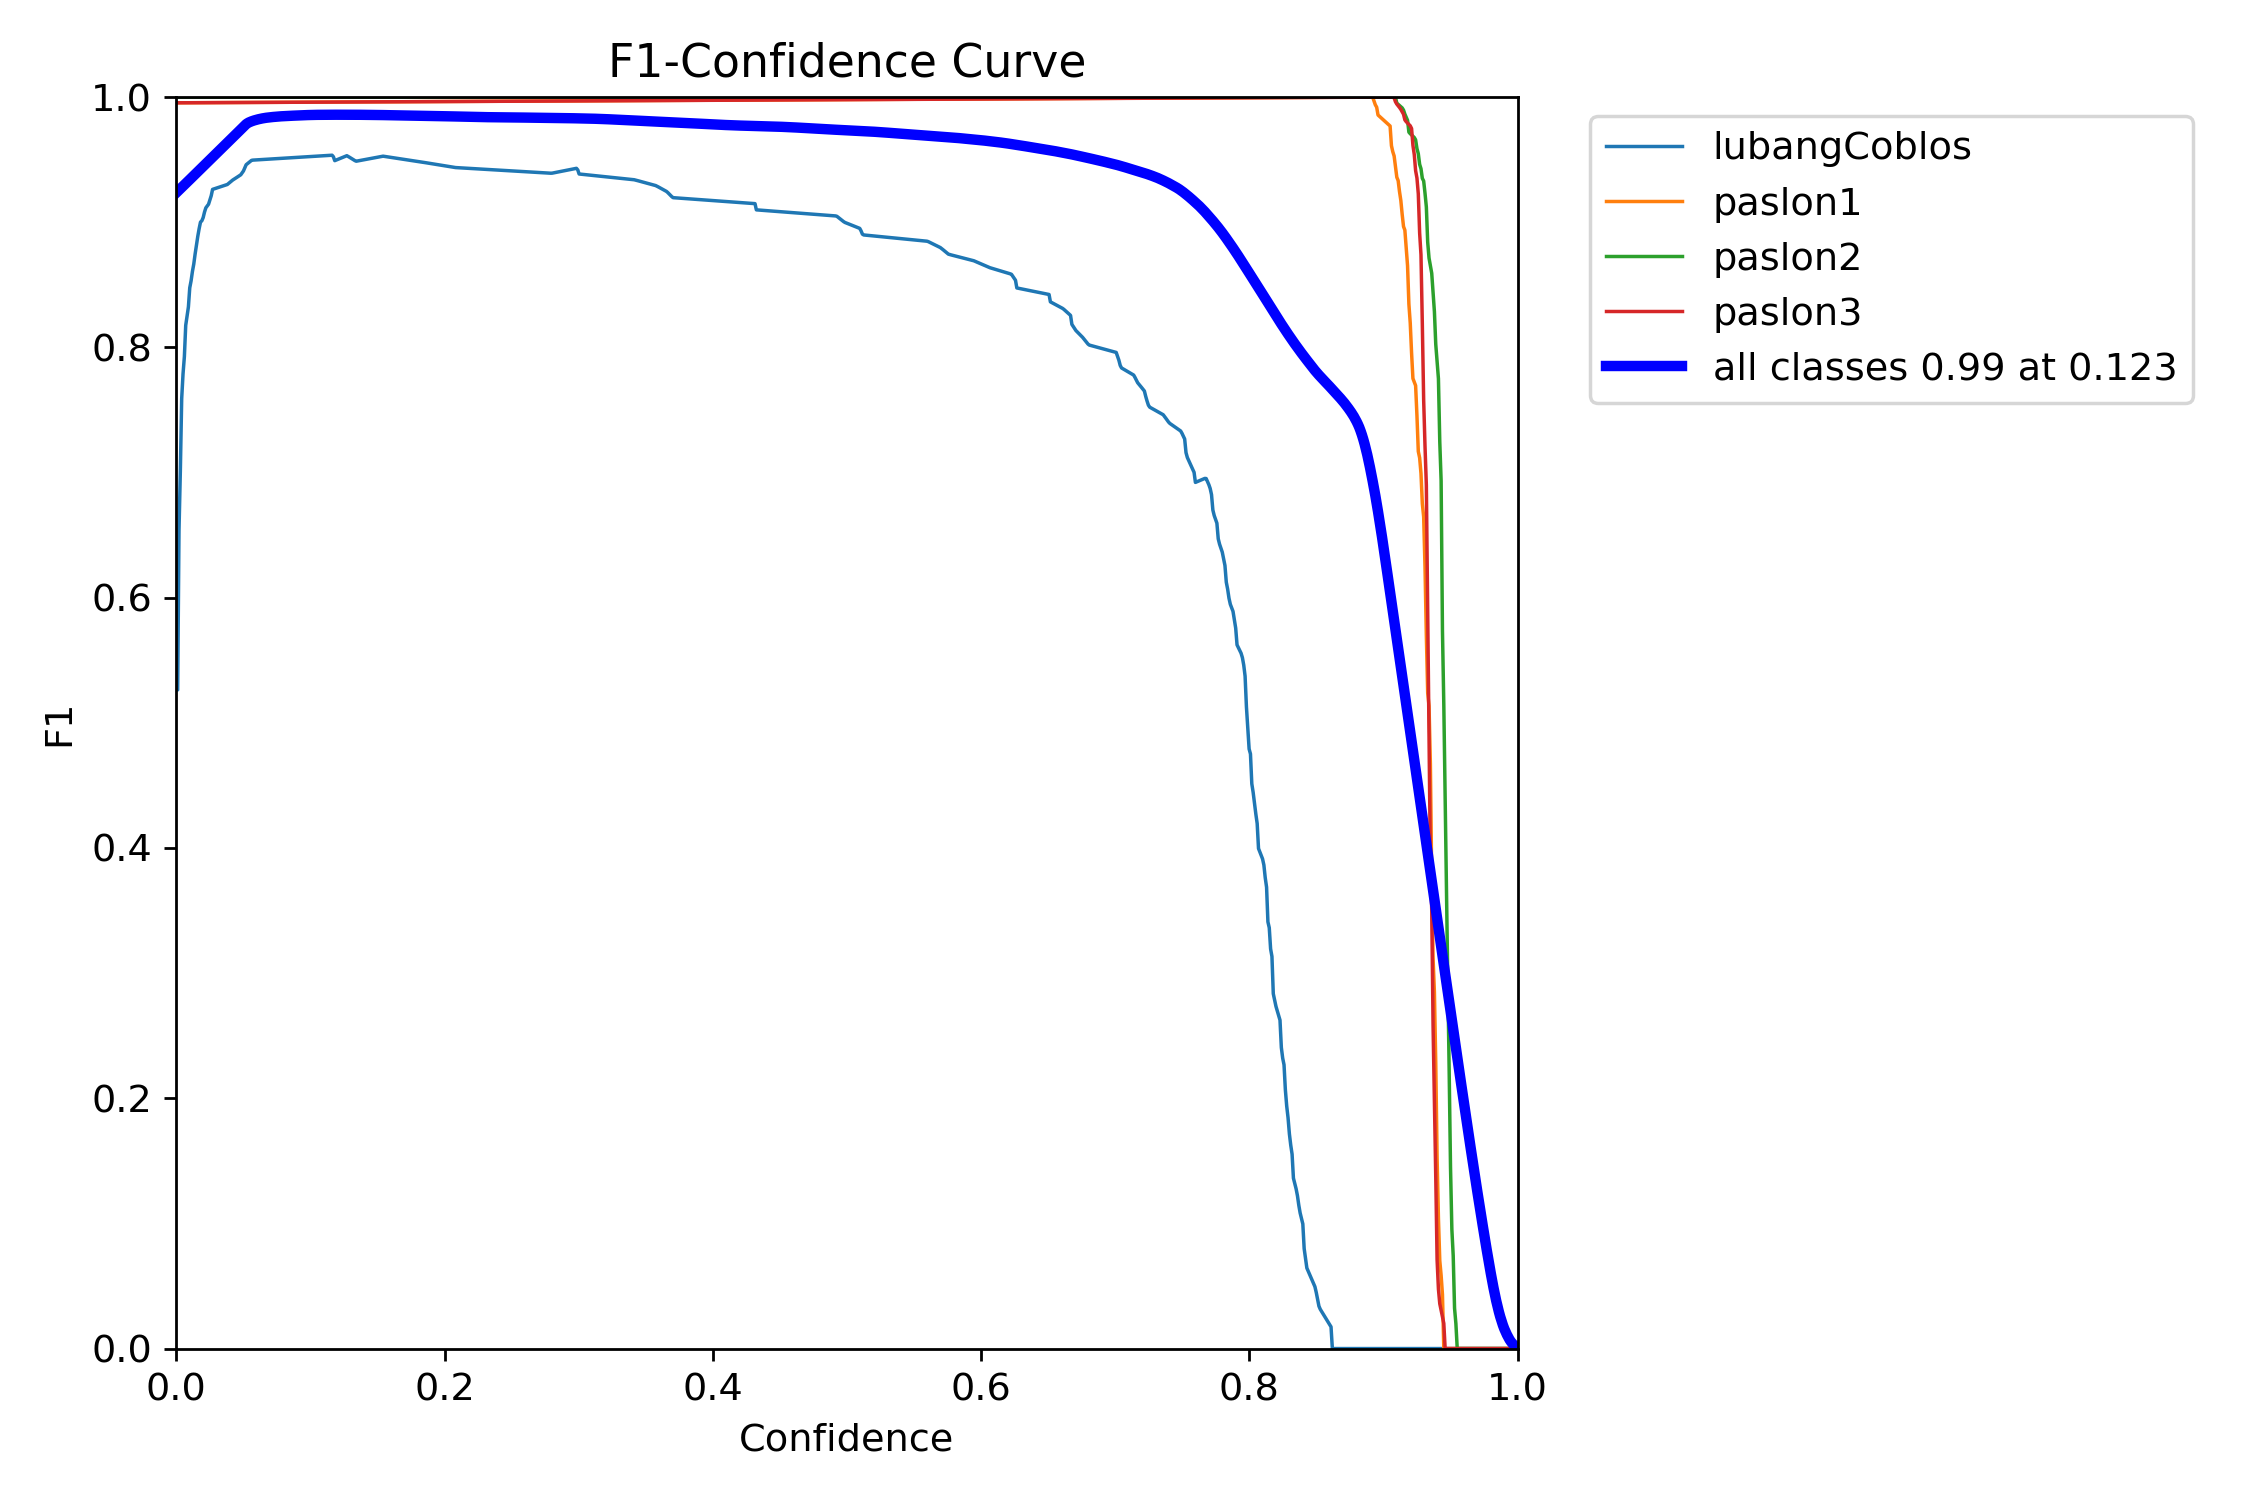

In [ ]:
Image(filename=f'/content/runs/detect/train/F1_curve.png', width=800)

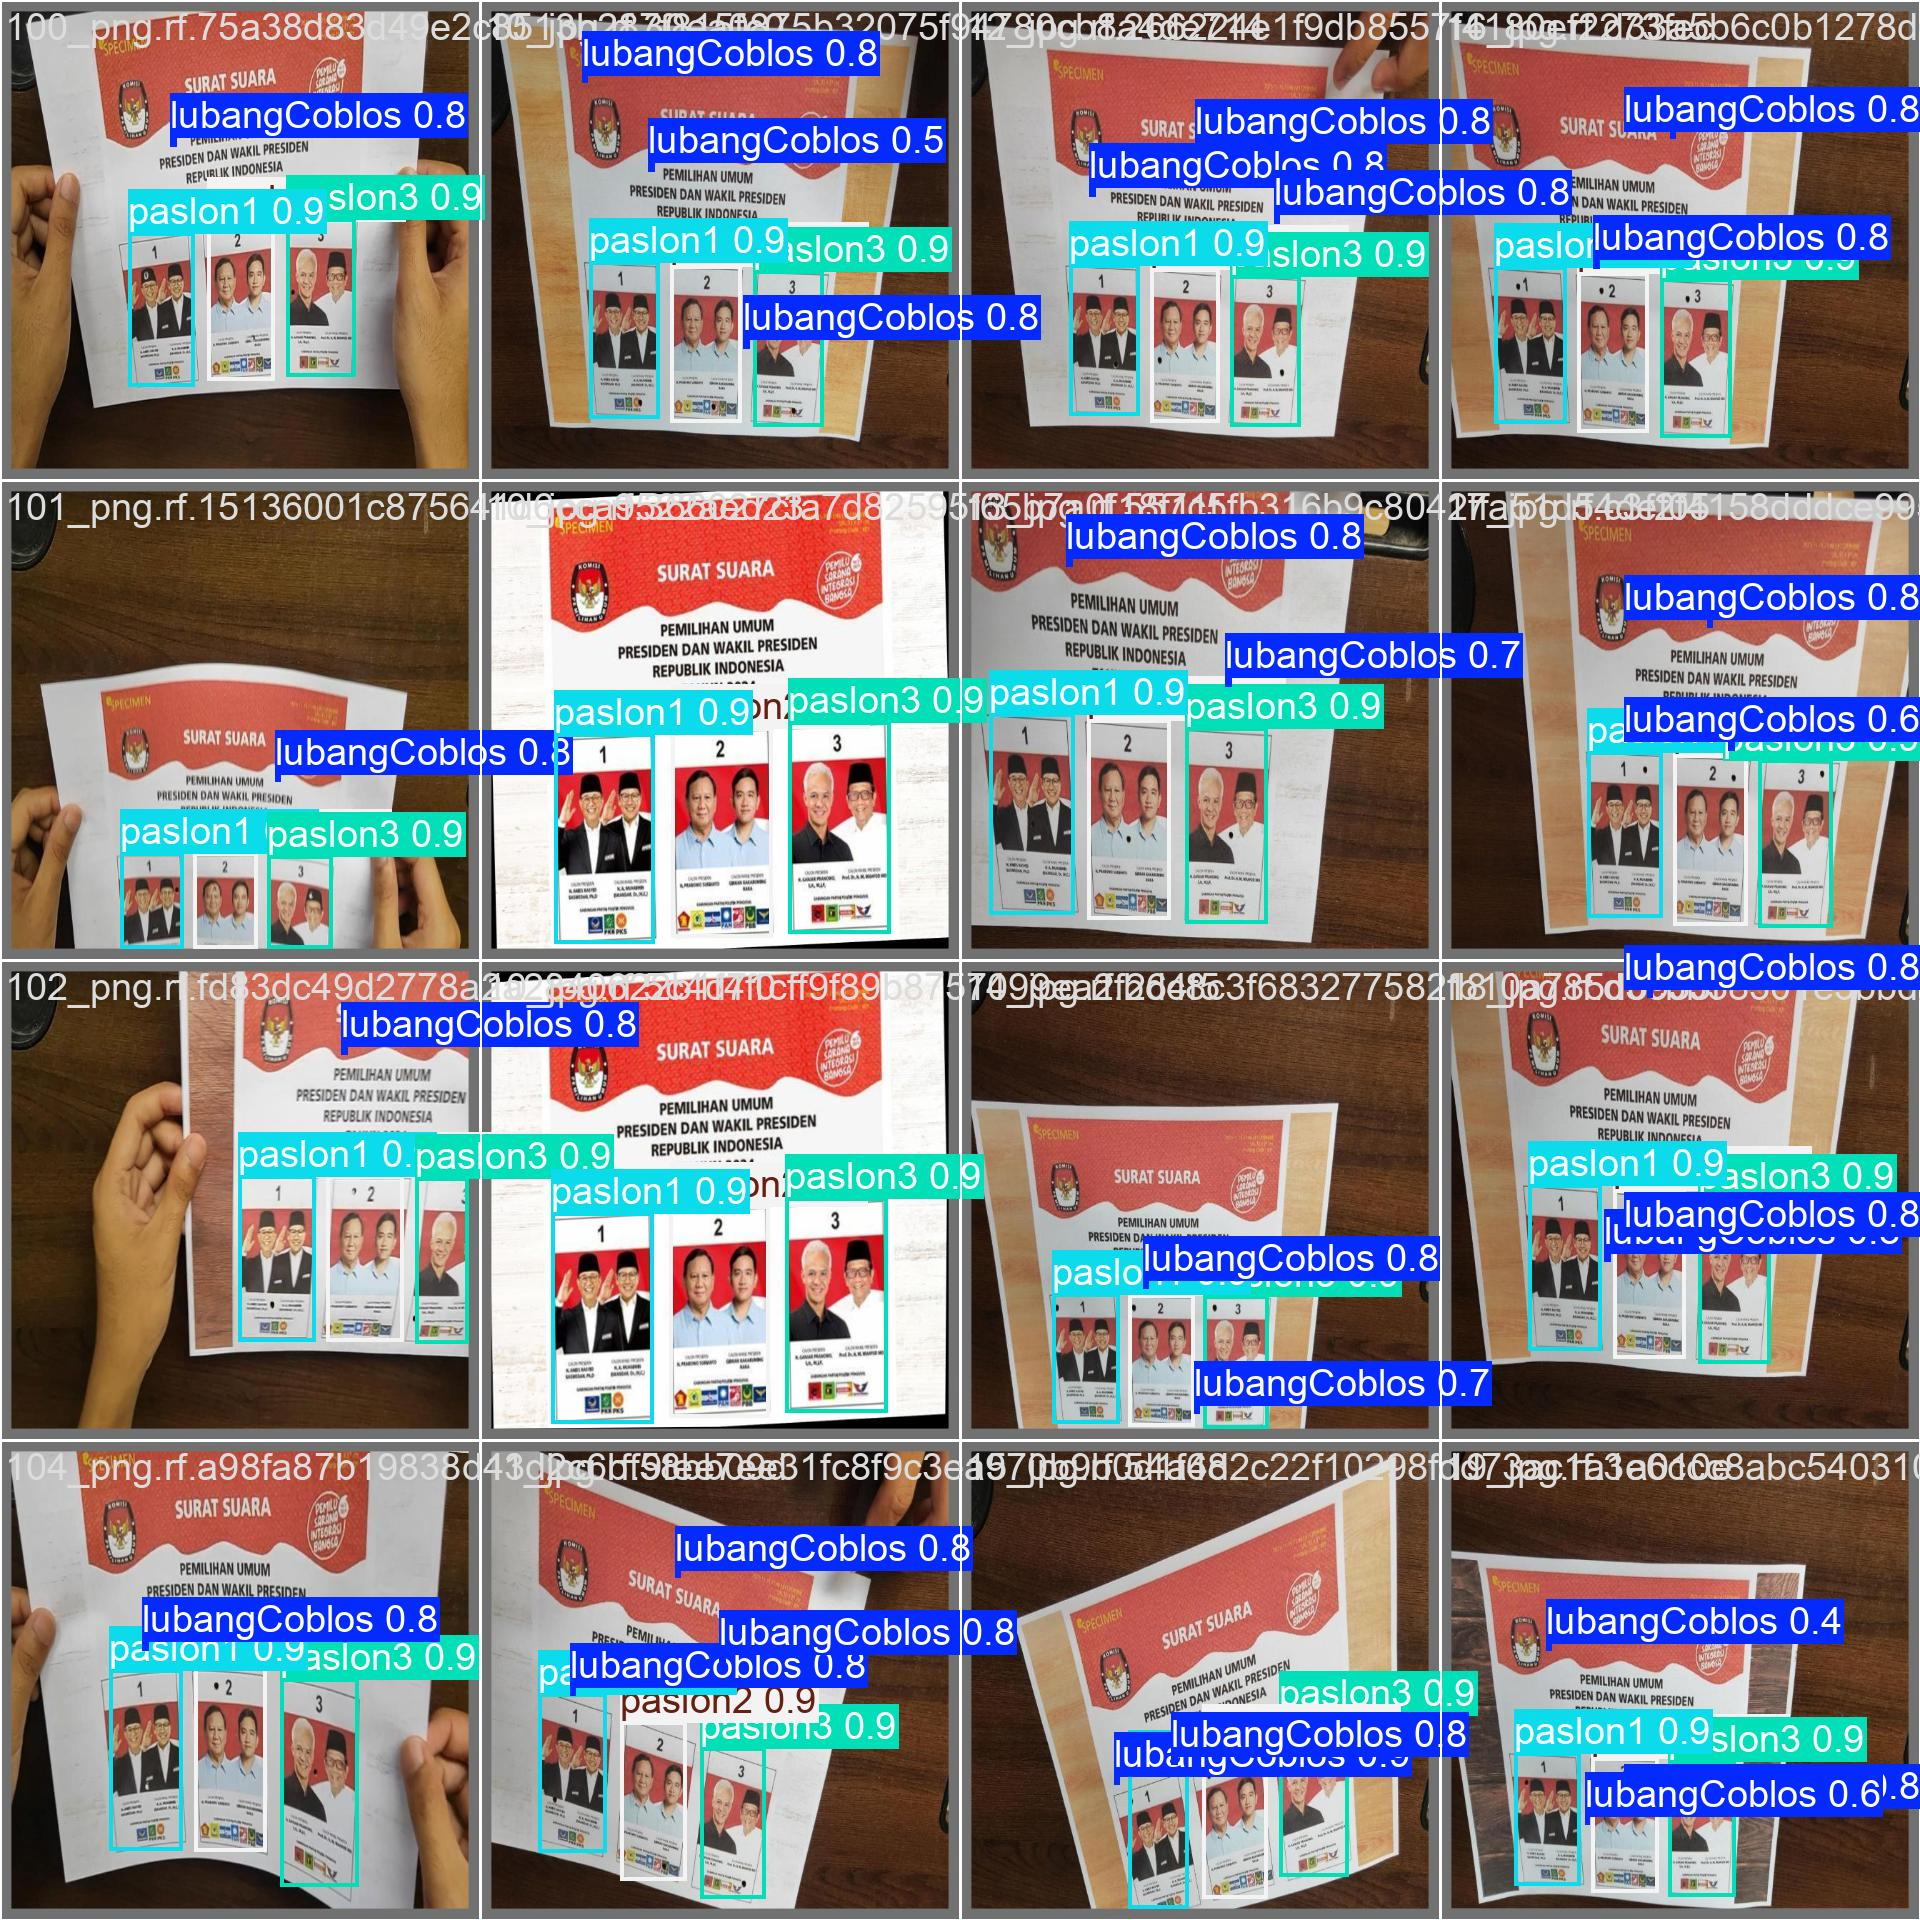

In [ ]:
Image(filename=f'/content/runs/detect/train/val_batch0_pred.jpg', width=800)

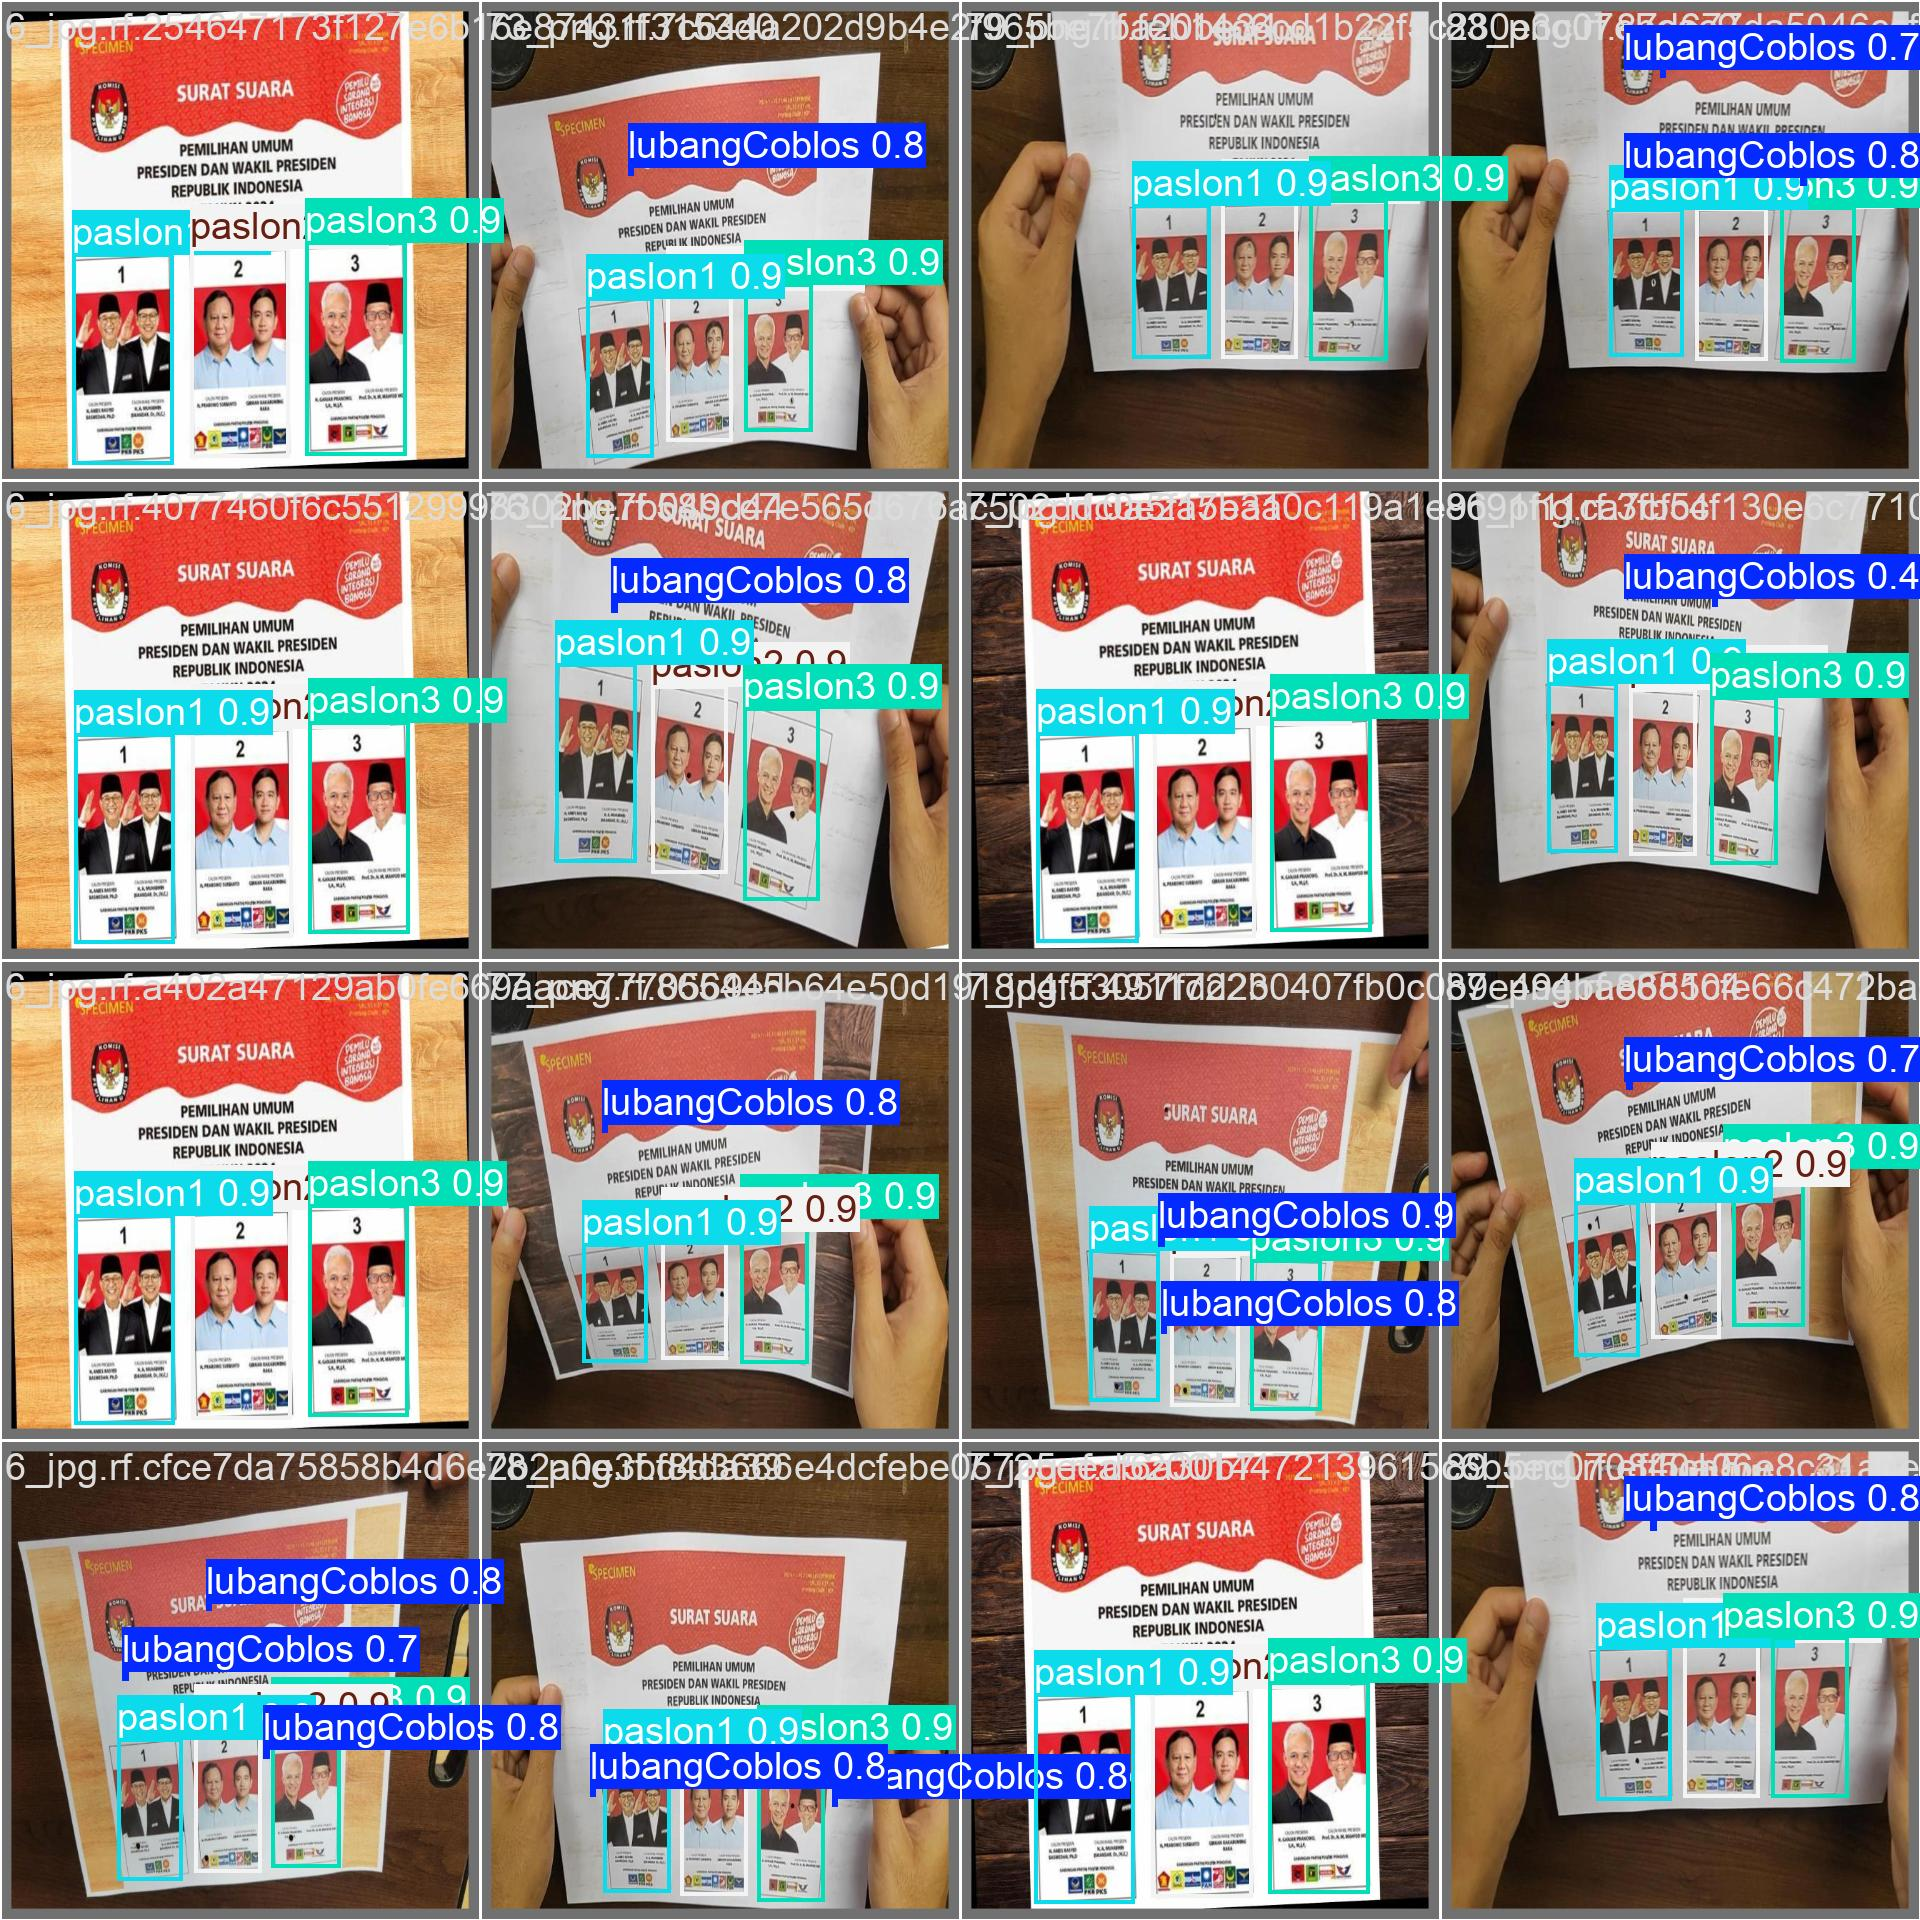

In [ ]:
Image(filename=f'/content/runs/detect/train/val_batch1_pred.jpg', width=800)

In [ ]:
!yolo task=detect mode=val model=/content/runs/detect/train/weights/best.pt data=/content/Skripsi2025---Pre1-2/data.yaml

Ultralytics 8.3.141 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 72 layers, 11,127,132 parameters, 0 gradients, 28.4 GFLOPs
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 1897.7±523.0 MB/s, size: 54.1 KB)
val: Scanning /content/Skripsi2025---Pre1-2/valid/labels.cache... 109 images, 0 backgrounds, 0 corrupt: 100% 109/109 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 7/7 [00:03<00:00,  2.05it/s]
                   all        109        447      0.989      0.985      0.985      0.815
          lubangCoblos         64        120      0.972      0.942      0.956      0.482
               paslon1        109        109      0.992          1      0.995      0.905
               paslon2        109        109          1          1      0.995      0.948
               paslon3        109        109      0.992          1      0.995      0.926
Speed: 1.9ms preprocess, 10.9ms inference, 0.0ms

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
model = YOLO('/content/runs/detect/train/weights/best.pt')

results = model.predict(source='/content/Data Test/images', conf=0.8, save=True)


image 1/25 /content/Data Test/images/VID20250304095846_mp4-0242.jpg: 384x640 1 paslon1, 1 paslon2, 1 paslon3, 47.6ms
image 2/25 /content/Data Test/images/VID20250304095846_mp4-0243.jpg: 384x640 1 paslon1, 1 paslon2, 1 paslon3, 10.8ms
image 3/25 /content/Data Test/images/VID20250304095846_mp4-0244.jpg: 384x640 1 paslon1, 1 paslon2, 1 paslon3, 10.8ms
image 4/25 /content/Data Test/images/VID20250304095846_mp4-0245.jpg: 384x640 1 paslon1, 1 paslon2, 1 paslon3, 10.8ms
image 5/25 /content/Data Test/images/VID20250304095846_mp4-0246.jpg: 384x640 1 paslon1, 1 paslon2, 1 paslon3, 10.7ms
image 6/25 /content/Data Test/images/VID20250304095955_mp4-0240.jpg: 384x640 1 paslon1, 1 paslon2, 1 paslon3, 10.7ms
image 7/25 /content/Data Test/images/VID20250304095955_mp4-0241.jpg: 384x640 1 paslon1, 1 paslon2, 1 paslon3, 10.8ms
image 8/25 /content/Data Test/images/VID20250304095955_mp4-0242.jpg: 384x640 1 paslon1, 1 paslon2, 1 paslon3, 10.7ms
image 9/25 /content/Data Test/images/VID20250304095955_mp4-0243

In [ ]:
import glob
from IPython.display import Image, display

for image_path in glob.glob(f'/content/runs/detect/predict/*.jpg')[:25]:
      display(Image(filename=image_path, width=600))
      print("\n")

In [ ]:
model = YOLO('/content/runs/detect/train/weights/best.pt')

results = model.predict(source='/content/gdrive/MyDrive/Skripsi Colab/Datatest', conf=0.6, save=True)


image 1/21 /content/gdrive/MyDrive/Skripsi Colab/Datatest/16.jpg: 384x640 2 lubangCobloss, 1 paslon1, 1 paslon2, 1 paslon3, 12.2ms
image 2/21 /content/gdrive/MyDrive/Skripsi Colab/Datatest/23.jpg: 384x640 1 paslon1, 1 paslon2, 1 paslon3, 10.8ms
image 3/21 /content/gdrive/MyDrive/Skripsi Colab/Datatest/29.jpg: 384x640 2 lubangCobloss, 1 paslon1, 1 paslon2, 1 paslon3, 13.9ms
image 4/21 /content/gdrive/MyDrive/Skripsi Colab/Datatest/3.jpg: 384x640 2 lubangCobloss, 1 paslon1, 1 paslon2, 1 paslon3, 15.0ms
image 5/21 /content/gdrive/MyDrive/Skripsi Colab/Datatest/32.jpg: 384x640 1 lubangCoblos, 1 paslon1, 1 paslon2, 1 paslon3, 10.8ms
image 6/21 /content/gdrive/MyDrive/Skripsi Colab/Datatest/42.jpg: 384x640 2 lubangCobloss, 1 paslon1, 1 paslon2, 1 paslon3, 10.8ms
image 7/21 /content/gdrive/MyDrive/Skripsi Colab/Datatest/VID20250304095743_mp4-0110.jpg: 384x640 1 paslon1, 1 paslon2, 1 paslon3, 10.8ms
image 8/21 /content/gdrive/MyDrive/Skripsi Colab/Datatest/VID20250304095743_mp4-0111.jpg: 384x

In [ ]:
import glob
from IPython.display import Image, display

for image_path in glob.glob(f'/content/runs/detect/predict2/*.jpg')[:25]:
      display(Image(filename=image_path, width=600))
      print("\n")

In [ ]:
model = YOLO('/content/runs/detect/train/weights/best.pt')

results = model.predict(source='/content/DataTestLubang', conf=0.2, save=True)


image 1/24 /content/DataTestLubang/166.png: 384x640 1 paslon1, 1 paslon2, 1 paslon3, 13.5ms
image 2/24 /content/DataTestLubang/167.png: 384x640 1 paslon1, 1 paslon2, 1 paslon3, 10.8ms
image 3/24 /content/DataTestLubang/168.png: 384x640 1 lubangCoblos, 1 paslon1, 1 paslon2, 1 paslon3, 10.8ms
image 4/24 /content/DataTestLubang/169.png: 384x640 1 lubangCoblos, 1 paslon1, 1 paslon2, 1 paslon3, 10.8ms
image 5/24 /content/DataTestLubang/170.png: 384x640 2 lubangCobloss, 1 paslon1, 1 paslon2, 1 paslon3, 10.8ms
image 6/24 /content/DataTestLubang/357.png: 384x640 2 lubangCobloss, 1 paslon1, 1 paslon2, 1 paslon3, 10.8ms
image 7/24 /content/DataTestLubang/358.png: 384x640 1 lubangCoblos, 1 paslon1, 1 paslon2, 1 paslon3, 10.8ms
image 8/24 /content/DataTestLubang/359.png: 384x640 1 lubangCoblos, 1 paslon1, 1 paslon2, 1 paslon3, 10.8ms
image 9/24 /content/DataTestLubang/360.png: 384x640 1 lubangCoblos, 1 paslon1, 1 paslon2, 1 paslon3, 10.8ms
image 10/24 /content/DataTestLubang/361.png: 384x640 1 lu

In [ ]:
import glob
from IPython.display import Image, display

for image_path in glob.glob(f'/content/runs/detect/predict3/*.jpg')[:25]:
      display(Image(filename=image_path, width=600))
      print("\n")

In [ ]:
import shutil

# Membuat file zip dari folder 'runs'
shutil.make_archive('runs', 'zip', 'runs')

'/content/runs.zip'